In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
%cd /content/gdrive/My Drive/projec

/content/gdrive/My Drive/projec


In [ ]:
!unzip -uq "./images.zip" -d "./unzipped"

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import keras

In [4]:
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras version

import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.4.0
keras: 2.4.3


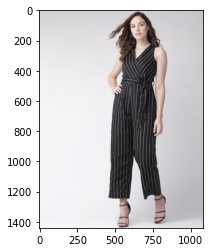

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('./unzipped/images/pic_9.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [6]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import time

import re
import random
from random import choice


In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv("./dataset.csv")

In [ ]:
data

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg
...,...,...,...,...,...,...
495,S.O.I.E. Black Asymmetric Cape Top,Black will never go out of style. This sheer t...,Polyester,Solid/Plain,Round Neck,/images/pic_495.jpg
496,Multi-Color Striped Modern Dress,This multi-color dress by GAP is crafted in co...,Cotton,Stripes,Round Neck,/images/pic_496.jpg
497,Rose Embroidery Summer White Mini Dress,This white dress by Attic Salt is crafted in p...,Polyester,Printed,Boat Neck,/images/pic_497.jpg
498,Black Solid Dhoti Style Jumpsuit With Belt,"Featuring a dhoti style bottom, this black jum...",Polyester,Solid/Plain,Shoulder Straps,/images/pic_498.jpg


In [8]:
PAD = "#PAD#"
UNK = "#UNK#"
START = "#START#"
END = "#END#"

# split sentence into tokens (split into lowercased words)
def split_sentence(sentence):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', sentence.lower())))

def generate_vocabulary(data):
    """
    Return {token: index} for all train tokens (words) that occur 5 times or more, 
        `index` should be from 0 to N, where N is a number of unique tokens in the resulting dictionary.
    Use `split_sentence` function to split sentence into tokens.
    Also, add PAD (for batch padding), UNK (unknown, out of vocabulary), 
        START (start of sentence) and END (end of sentence) tokens into the vocabulary.
    """
    all_words=[]
    for i in range(len(data['Description'])):
      
      p=split_sentence(data['Description'][i])
      all_words.append(p)
    
    voc=[]
    for i in range(len(all_words)):
      for j in range(len(all_words[i])):
        voc.append(all_words[i][j])

    from collections import Counter

    

    cnt = Counter()
    for word in voc:
        cnt[word] += 1
        
    vocab=[PAD,UNK,START,END]
    for key in cnt:
        if(cnt[key]>=5):
            vocab.append(key)

    


    
    return {token: index for index, token in enumerate(sorted(vocab))}
    
def caption_tokens_to_indices(data,vocab):
    """
    `captions` argument is an array of arrays:
    [
        [
            "image1 caption1",
            "image1 caption2",
            ...
        ],
        [
            "image2 caption1",
            "image2 caption2",
            ...
        ],
        ...
    ]
    Use `split_sentence` function to split sentence into tokens.
    Replace all tokens with vocabulary indices, use UNK for unknown words (out of vocabulary).
    Add START and END tokens to start and end of each sentence respectively.
    For the example above you should produce the following:
    [
        [
            [vocab[START], vocab["image1"], vocab["caption1"], vocab[END]],
            [vocab[START], vocab["image1"], vocab["caption2"], vocab[END]],
            ...
        ],
        ...
    ]
    """
    res2=[]
    for i in range(len(data['Description'])):
      
      
      p=split_sentence(data['Description'][i])
      p.insert(0,START)
      p.append(END)
      res1=[]
      for x in p:
        if x not in vocab.keys():
          res1.append(vocab[UNK])
        else:
          res1.append(vocab[x])
      
      res2.append(res1)
        
    
    return res2

2

In [ ]:
data['Description'][1]

'This check pattern top by Work Label is crafted in cotton. Featuring a bias check at the yoke and straight check pattern in bottom half, a smart round Neckline, 3/4th sleeves, this mid hip length top offers a stylish & comfortable fit. Style this top with a trouser/skirt and medium high heels for chic look at work. This top can also be styled with a pair of stud earrings and a pair your regular sneakers to attain a casual look.'

In [ ]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
# Preparing the image data 
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

In [ ]:
directory = './unzipped/images'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))





Instructions for updating:
keep_dims is deprecated, use keepdims instead
552345600/553467096 [============================>.] - ETA: 0sWARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:154: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
__________________________________________________________

In [29]:
# split dataset into train and test
sp=0.8
train_data=data[:int(0.8*len(data))]
test_data=data[len(train_data):].reset_index()

In [30]:
vocs=generate_vocabulary(data)
train_capt=caption_tokens_to_indices(train_data,vocs)
test_capt=caption_tokens_to_indices(test_data,vocs)

In [31]:
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

In [32]:
from pickle import load
train=[train_data["Image_Path"][i][8:-4] for i in range(len(train_data))]
test=[test_data["Image_Path"][i][8:-4] for i in range(len(test_data))]


In [33]:
train

['pic_0',
 'pic_1',
 'pic_2',
 'pic_3',
 'pic_4',
 'pic_5',
 'pic_6',
 'pic_7',
 'pic_8',
 'pic_9',
 'pic_10',
 'pic_11',
 'pic_12',
 'pic_13',
 'pic_14',
 'pic_15',
 'pic_16',
 'pic_17',
 'pic_18',
 'pic_19',
 'pic_20',
 'pic_21',
 'pic_22',
 'pic_23',
 'pic_24',
 'pic_25',
 'pic_26',
 'pic_27',
 'pic_28',
 'pic_29',
 'pic_30',
 'pic_31',
 'pic_32',
 'pic_33',
 'pic_34',
 'pic_35',
 'pic_36',
 'pic_37',
 'pic_38',
 'pic_39',
 'pic_40',
 'pic_41',
 'pic_42',
 'pic_43',
 'pic_44',
 'pic_45',
 'pic_46',
 'pic_47',
 'pic_48',
 'pic_49',
 'pic_50',
 'pic_51',
 'pic_52',
 'pic_53',
 'pic_54',
 'pic_55',
 'pic_56',
 'pic_57',
 'pic_58',
 'pic_59',
 'pic_60',
 'pic_61',
 'pic_62',
 'pic_63',
 'pic_64',
 'pic_65',
 'pic_66',
 'pic_67',
 'pic_68',
 'pic_69',
 'pic_70',
 'pic_71',
 'pic_72',
 'pic_73',
 'pic_74',
 'pic_75',
 'pic_76',
 'pic_77',
 'pic_78',
 'pic_79',
 'pic_80',
 'pic_81',
 'pic_82',
 'pic_83',
 'pic_84',
 'pic_85',
 'pic_86',
 'pic_87',
 'pic_88',
 'pic_89',
 'pic_90',
 'pic_91'

In [39]:
features=load_photo_features("features.pkl",train)

In [ ]:
all_features = load(open("features.pkl", 'rb'))

In [41]:
features_test=load_photo_features("features.pkl",test)

In [43]:
features_test

{'pic_400': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'pic_401': array([[0.        , 0.6012657 , 0.        , ..., 0.        , 0.        ,
         0.07673854]], dtype=float32),
 'pic_402': array([[0.        , 0.23901968, 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'pic_403': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'pic_404': array([[0.65102845, 0.        , 0.        , ..., 0.23182651, 1.8890007 ,
         0.        ]], dtype=float32),
 'pic_405': array([[0.47697604, 0.        , 0.        , ..., 0.        , 2.7531393 ,
         0.16598421]], dtype=float32),
 'pic_406': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         1.9045718]], dtype=float32),
 'pic_407': array([[1.3776956, 2.0056658, 0.       , ..., 0.       , 3.5551283,
         0.       ]], dtype=float32),
 'pic_408': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'pic_409': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),


In [ ]:
def captions_to_matrix(captions, pad_idx, max_len=None):
    """
    `batch_captions` is an array of arrays:
    [
        [vocab[START], ..., vocab[END]],
        [vocab[START], ..., vocab[END]],
        ...
    ]
    Put vocabulary indexed captions into np.array of shape (len(batch_captions), columns),
        where "columns" is max(map(len, batch_captions)) when max_len is None
        and "columns" = min(max_len, max(map(len, batch_captions))) otherwise.
    Add padding with pad_idx where necessary.
    Input example: [[1, 2, 3], [4, 5]]
    Output example: np.array([[1, 2, 3], [4, 5, pad_idx]]) if max_len=None
    Output example: np.array([[1, 2], [4, 5]]) if max_len=2
    Output example: np.array([[1, 2, 3], [4, 5, pad_idx]]) if max_len=100
    Try to use numpy, we need this function to be fast!
    """
    if(max_len==None):
        col_len = max(map(len, captions))
    else:
        col_len = min(max_len,max(map(len, captions)))
    matrix = np.zeros([len(captions), col_len]) + pad_idx

    for index,line in enumerate(captions):
        matrix[index,:len(line)] = line[0:max_len]
        matrix[index,len(line):] = pad_idx
    
    return matrix

In [ ]:
pad_idx = vocs[PAD]
x=captions_to_matrix(train_capt, pad_idx,max_len=40)
len(x)
x

array([[  2., 429., 414., ...,   3., 171.,  72.],
       [  2., 429.,  75., ..., 438.,   3.,   9.],
       [  2., 158., 139., ..., 426., 255.,   0.],
       ...,
       [  2., 429., 438., ...,   1.,   1.,   1.],
       [  2., 429., 316., ..., 209., 437.,  92.],
       [  2.,   3.,  29., ...,   1.,   1.,   1.]])

In [ ]:
X1=[]
X2=[]
y_train=[]
for i in range(len(train_data)):
  for j in range(1,len(x[i])):
    a=x[i][:j]
    b=x[i][j]
    in_seq = np.array(pad_sequences([a], maxlen=max_length)[0])
    # encode output sequence
    out_seq = np.array(to_categorical([b], num_classes=vocab_size)[0])
    X2.append(in_seq)
    X1.append(features[train[i]][0])
    y_train.append(out_seq)
    


In [ ]:
X1=np.array(X1)
X2=np.array(X2)
y_train=np.array(y_train)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(y)

15600

In [ ]:
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

In [94]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [ ]:
max_len=40
vocab_size=len(vocs)
model = define_model(vocab_size, max_len)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      124160      input_4[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 4096)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.fit(x=[X1, X2], y=y_train, epochs=20, verbose=2)

Epoch 1/20
488/488 - 160s - loss: 4.2173
Epoch 2/20
488/488 - 157s - loss: 3.5712
Epoch 3/20
488/488 - 150s - loss: 2.9208
Epoch 4/20
488/488 - 155s - loss: 2.4115
Epoch 5/20
488/488 - 154s - loss: 2.0515
Epoch 6/20
488/488 - 156s - loss: 1.7737
Epoch 7/20
488/488 - 155s - loss: 1.5405
Epoch 8/20
488/488 - 156s - loss: 1.3362
Epoch 9/20
488/488 - 152s - loss: 1.1544
Epoch 10/20
488/488 - 155s - loss: 0.9962
Epoch 11/20
488/488 - 156s - loss: 0.8431
Epoch 12/20
488/488 - 155s - loss: 0.7438
Epoch 13/20
488/488 - 156s - loss: 0.6250
Epoch 14/20
488/488 - 155s - loss: 0.5328
Epoch 15/20
488/488 - 152s - loss: 0.4692
Epoch 16/20
488/488 - 148s - loss: 0.4042
Epoch 17/20
488/488 - 152s - loss: 0.3697
Epoch 18/20
488/488 - 155s - loss: 0.3481
Epoch 19/20
488/488 - 152s - loss: 0.3126
Epoch 20/20
488/488 - 141s - loss: 0.2881


In [ ]:
model.save("model.h5")

In [37]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')

In [14]:
vocabulary=generate_vocabulary(data)

def get_seq(words):
  seq=[]
  a=words.split()
  for i in range(len(a)):
    if a[i] not in vocabulary.keys():
        seq.append(vocabulary[UNK])
    else:
        seq.append(vocabulary[a[i]])
  return seq

In [16]:
get_seq("he")

[3]

In [24]:
def word_for_id(integer, vocabulary):
  word=list(vocabulary.keys())[list(vocabulary.values()).index(integer)]
  return word

In [25]:
word_for_id(2,vocabulary)

'#START#'

In [78]:
a=[PAD,UNK,START,END]
def generate_desc(model, vocabulary, photo, max_length):
    # seed the generation process
    in_text = '#START#'
    
    # iterate over the whole length of the sequence
    for i in range(max_length):
      # integer encode input sequence
      sequence = get_seq(in_text)
      # pad input
      sequence = pad_sequences([sequence], maxlen=max_length)
      # predict next word
      yhat = model.predict([photo,sequence], verbose=0)
      # convert probability to integer
      yhat = argmax(yhat)
      # map integer to word
      word = word_for_id(yhat, vocabulary)
      # stop if we cannot map the word
      if word is None:
        break
      # append as input for generating the next word
      in_text += ' ' + word
      # stop if we predict the end of the sequence
      if word == END:
        break
    
    p=in_text.split()
    for i in range(len(p)):
      if p[i] in a:
        p[i]=""

    return " ".join(p)

In [35]:
# evaluate the skill of the model
def evaluate_model(model, img_keys, data, photos, vocabulary, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for i in range(len(img_keys)):
		# generate description
		yhat = generate_desc(model, vocabulary, photos[img_keys[i]], max_length)
		# store actual and predicted
		references = data['Description'][i].split() 
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [36]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 

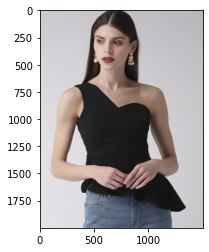

In [65]:
# Let's see an example caption for image
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('./unzipped/images/pic_453.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [79]:
generate_desc(model, vocabulary,features_test["pic_453"],40 )

' this black top by gap is crafted in cotton and makes the perfect pick to don for daytime events and occasions style this stunning dress with a pair of skinny denims high heels to complete the look for easy look'

In [80]:
evaluate_model(model,test,test_data,features_test,vocabulary,40)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.041549
BLEU-2: 0.005197
BLEU-3: 0.042603
BLEU-4: 0.072088


In [81]:
#DONE

In [87]:
a1=len(set(list(data["Pattern"])))
a2=len(set(list(data["Material"])))
a3=len(set(list(data["Neckline"])))

In [139]:
# Now we need to train the model for classification purpose for pattern, material and neckline
def model_pattern():
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1) 
    fe2 = Dense(256, activation='relu')(fe1)
    fe3 = Dropout(0.5)(fe2)
    output = Dense(a1,activation='softmax')(fe3)
    model = Model(inputs=inputs1, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model


In [114]:
X_train=[]
for i in range(len(train_data)):
  X_train.append(features[train[i]][0])


In [116]:
X_test=[]
for i in range(len(test_data)):
  X_test.append(features_test[test[i]][0])

In [117]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1=le.fit_transform(train_data["Pattern"])
y2=le.fit_transform(test_data["Pattern"])

In [120]:
X_train

array([[0.        , 0.        , 0.20949492, ..., 0.        , 1.6513581 ,
        3.5447073 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.21400225, 0.        ,
        0.        ],
       ...,
       [0.        , 1.1750764 , 0.        , ..., 0.        , 0.        ,
        2.0602505 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.6464252 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [137]:
y_train=np.array(to_categorical(y1, num_classes=a1))
y_test=np.array(to_categorical(y2, num_classes=a1))

In [140]:
model=model_pattern()
model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 4096)]            0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 18)                4626      
Total params: 1,053,458
Trainable params: 1,053,458
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 3.8913 - val_loss: 6.2441
Epoch 2/10

In [141]:
y_pred=model.predict(X_test)

In [145]:
yhat=[argmax(y_pred[i]) for i in range(len(y_pred))]